In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("E:/Mohammad/CS/Machine Learning/bio/dataset/ischemia.txt", sep='\t')

In [ ]:
print(df.describe())
print(df.info())

In [3]:
df = df.dropna()

In [ ]:
df['Diastolic.function'].unique()

In [4]:
dias = []
for x in df['Diastolic.function']:
    if(x=='NL'):
        dias.append(1)
    else:
        dias.append(0)
df['dias_func'] = dias
df

,age,Ischemia,Diastolic.function,E,A,e,a,dias_func
0,32.0,POS,NL,1.31,0.58,0.20,0.08,1
1,35.0,POS,NL,0.92,0.51,0.15,0.07,1
2,41.0,POS,NL,0.84,0.61,0.13,0.08,1
3,33.0,POS,NL,1.04,0.45,0.17,0.06,1
4,30.0,POS,NL,1.11,0.49,0.18,0.07,1
...,...,...,...,...,...,...,...,...
997,34.0,NEG,NL,0.99,0.71,0.13,0.12,1
998,30.0,NEG,NL,0.99,0.67,0.13,0.11,1
999,35.0,NEG,NL,1.11,0.49,0.15,0.08,1
1000,36.0,NEG,NL,1.24,0.53,0.16,0.09,1


In [5]:
tar = []
for x in df['Ischemia']:
    if(x=='POS'):
        tar.append(1)
    else:
        tar.append(0)
df['target'] = tar
df

,age,Ischemia,Diastolic.function,E,A,e,a,dias_func,target
0,32.0,POS,NL,1.31,0.58,0.20,0.08,1,1
1,35.0,POS,NL,0.92,0.51,0.15,0.07,1,1
2,41.0,POS,NL,0.84,0.61,0.13,0.08,1,1
3,33.0,POS,NL,1.04,0.45,0.17,0.06,1,1
4,30.0,POS,NL,1.11,0.49,0.18,0.07,1,1
...,...,...,...,...,...,...,...,...,...
997,34.0,NEG,NL,0.99,0.71,0.13,0.12,1,0
998,30.0,NEG,NL,0.99,0.67,0.13,0.11,1,0
999,35.0,NEG,NL,1.11,0.49,0.15,0.08,1,0
1000,36.0,NEG,NL,1.24,0.53,0.16,0.09,1,0


In [6]:
df = df.drop(['Diastolic.function','Ischemia'],1)

In [ ]:
sns.pairplot(df)

In [ ]:
df.describe()

In [7]:
df = df.drop(214,0)
df = df.drop(780,0)
df = df.drop(624,0)
df = df.drop(544,0)
df

,age,E,A,e,a,dias_func,target
0,32.0,1.31,0.58,0.20,0.08,1,1
1,35.0,0.92,0.51,0.15,0.07,1,1
2,41.0,0.84,0.61,0.13,0.08,1,1
3,33.0,1.04,0.45,0.17,0.06,1,1
4,30.0,1.11,0.49,0.18,0.07,1,1
...,...,...,...,...,...,...,...
997,34.0,0.99,0.71,0.13,0.12,1,0
998,30.0,0.99,0.67,0.13,0.11,1,0
999,35.0,1.11,0.49,0.15,0.08,1,0
1000,36.0,1.24,0.53,0.16,0.09,1,0


In [ ]:
sns.distplot(df['a'])

In [ ]:
sns.countplot(df['a'])

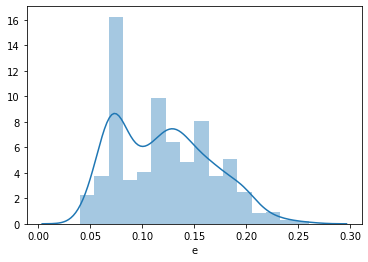

In [16]:
sns.distplot(df['e'])

In [17]:
df['A']

0       0.58
1       0.51
2       0.61
3       0.45
4       0.49
        ... 
997     0.71
998     0.67
999     0.49
1000    0.53
1001    0.46
Name: A, Length: 998, dtype: float64

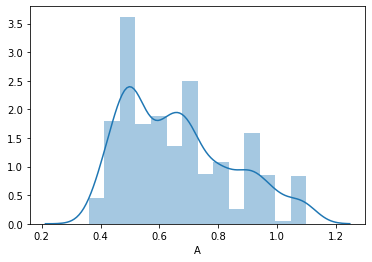

In [18]:
sns.distplot(df['A'])

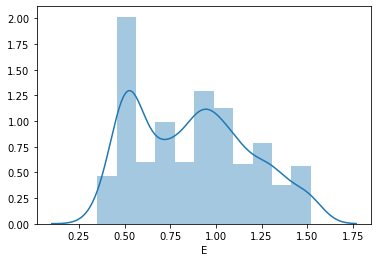

In [19]:
sns.distplot(df['E'])

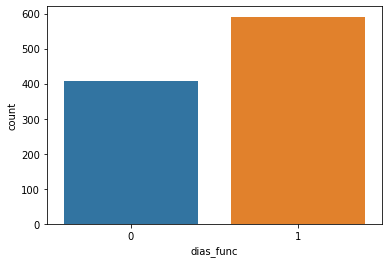

In [20]:
sns.countplot(df['dias_func'])

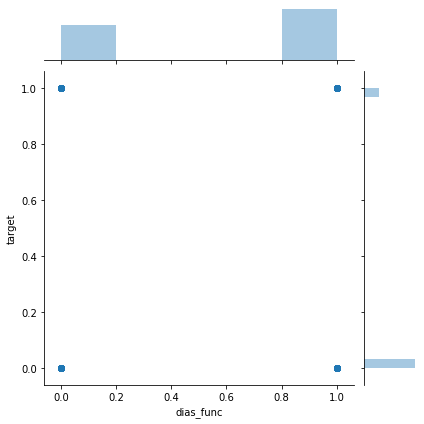

In [21]:
sns.jointplot(df['dias_func'],df['target'])

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('target',1)
y = df['target']
scaler.fit(X)
scaled_features = scaler.transform(X)
X = pd.DataFrame(scaled_features,columns = X.columns)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print('The confusion matrix is:')
print(confusion_matrix(y_test,pred))

The confusion matrix is:
[[215  15]
 [ 17  53]]


In [29]:
print('The classification report is:')
print(classification_report(y_test,pred))

The classification report is:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       230
           1       0.78      0.76      0.77        70

    accuracy                           0.89       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.89      0.89      0.89       300



Text(0, 0.5, 'Error_rate')

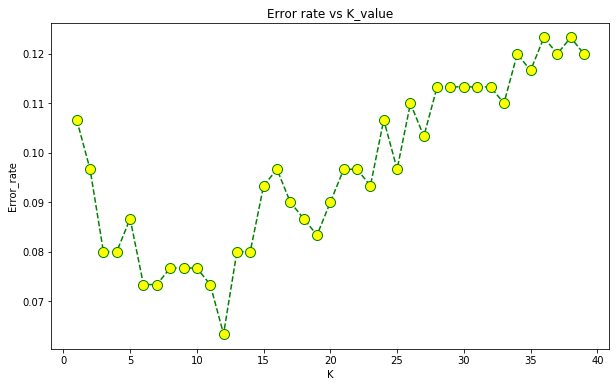

In [30]:
#Find best K_value
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color= 'green', linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=10)
plt.title('Error rate vs K_value')
plt.xlabel('K')
plt.ylabel('Error_rate')

In [32]:
#Use best K_value
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[226   4]
 [ 15  55]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       230
           1       0.93      0.79      0.85        70

    accuracy                           0.94       300
   macro avg       0.93      0.88      0.91       300
weighted avg       0.94      0.94      0.93       300



In [33]:
from sklearn.linear_model import Perceptron
perc = Perceptron()
perc.fit(X_train,y_train)
pred = perc.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[205  25]
 [  9  61]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       230
           1       0.71      0.87      0.78        70

    accuracy                           0.89       300
   macro avg       0.83      0.88      0.85       300
weighted avg       0.90      0.89      0.89       300



In [10]:
from cvxopt import matrix,solvers,spmatrix

In [11]:
size = len(y_train)
vec = [(matrix(X_train.iloc[i]).T*matrix(X_train.iloc[j])*y_train.iloc[i]*y_train.iloc[j])[0][0] for i in range(size) for j in range(size)]
Q = matrix(vec,(size,size))
p = matrix(-1.0,(1,size),'d').T
I = spmatrix(1.0, range(size), range(size))
G = matrix(I)
h = matrix(1.0,(1,size)).T
A = matrix(0.0, (1,size))
b = matrix(0.0)
sol=solvers.qp(Q, p, G, h)

     pcost       dcost       gap    pres   dres
 0: -1.1464e+03  1.0086e+03  7e+03  3e+00  3e+00
 1:  2.4629e+02 -8.0796e+02  1e+03  7e-02  7e-02
 2: -1.2894e+02 -6.6525e+02  5e+02  2e-02  2e-02
 3: -2.7522e+02 -6.4152e+02  4e+02  6e-03  6e-03
 4: -5.5778e+02 -5.7481e+02  2e+01  2e-04  2e-04
 5: -5.7123e+02 -5.7140e+02  2e-01  2e-06  2e-06
 6: -5.7136e+02 -5.7136e+02  2e-03  2e-08  2e-08
 7: -5.7136e+02 -5.7136e+02  2e-05  2e-10  2e-10
Optimal solution found.


In [38]:
y_pred = []
for i in range(len(y_test)):
    decider = 0
    for j in range(len(y_train)):
        decider += sol['x'][j]*y_train.iloc[j]*np.dot(X_test.iloc[i],X_train.iloc[j])
    if(decider>0):
        y_pred.append(1)
    else:
        y_pred.append(0)

NameError: name 'confusion_matrix' is not defined

In [40]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[174  56]
 [  6  64]]
              precision    recall  f1-score   support

           0       0.97      0.76      0.85       230
           1       0.53      0.91      0.67        70

    accuracy                           0.79       300
   macro avg       0.75      0.84      0.76       300
weighted avg       0.87      0.79      0.81       300



In [41]:
# RBF Kernel with gamma=1:
import math

def rbf(u,v):
    dif = u-v
    power = np.dot(dif.T,dif)
    return math.exp(-power)

vec = [(rbf(matrix(X_train.iloc[i]),matrix(X_train.iloc[j]))*y_train.iloc[i]*y_train.iloc[j]) for i in range(size) for j in range(size)]
Q = matrix(vec,(size,size))

In [42]:
p = matrix(-1.0,(1,size)).T
I = spmatrix(1.0, range(size), range(size))
G = matrix(I)
h = matrix(1.0,(1,size)).T
solrbf=solvers.qp(Q, p, G, h)

     pcost       dcost       gap    pres   dres
 0: -1.0971e+03  4.5859e+02  2e+03  2e+00  2e+00
 1: -2.9200e+02 -6.3683e+02  3e+02  2e-16  2e-16
 2: -5.3437e+02 -5.6548e+02  3e+01  8e-17  2e-16
 3: -5.5389e+02 -5.5934e+02  5e+00  1e-16  2e-16
 4: -5.5716e+02 -5.5840e+02  1e+00  1e-16  3e-16
 5: -5.5796e+02 -5.5817e+02  2e-01  1e-16  3e-16
 6: -5.5811e+02 -5.5812e+02  1e-02  1e-16  3e-16
 7: -5.5812e+02 -5.5812e+02  4e-04  1e-16  4e-16
Optimal solution found.


In [44]:
y_pred = []
for i in range(len(y_test)):
    decider = 0
    for j in range(len(y_train)):
        decider += solrbf['x'][j]*y_train.iloc[j]*np.dot(X_test.iloc[i],X_train.iloc[j])
    if(decider>0):
        y_pred.append(1)
    else:
        y_pred.append(0)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[174  56]
 [  6  64]]
              precision    recall  f1-score   support

           0       0.97      0.76      0.85       230
           1       0.53      0.91      0.67        70

    accuracy                           0.79       300
   macro avg       0.75      0.84      0.76       300
weighted avg       0.87      0.79      0.81       300



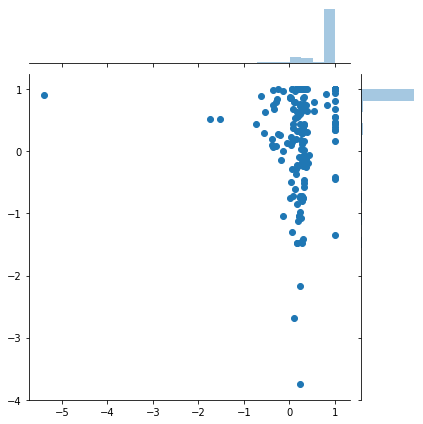

In [45]:
sns.jointplot(sol['x'],solrbf['x'])

In [47]:
np.mean(sol['x']),np.mean(solrbf['x'])

(0.8190648454810495, 0.8192783617632324)

In [49]:
from sklearn.svm import SVC

In [50]:
model = SVC()

In [51]:
model.fit(X_train,y_train)

C:\Users\shamsollah\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [52]:
predictions = model.predict(X_test)

In [53]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[224   6]
 [ 11  59]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       230
           1       0.91      0.84      0.87        70

    accuracy                           0.94       300
   macro avg       0.93      0.91      0.92       300
weighted avg       0.94      0.94      0.94       300



In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

In [57]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [58]:
grid.fit(X_train,y_train)

C:\Users\shamsollah\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.786, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.780, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.784, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.778, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.776, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.780, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[CV] ................... C=1000, gamma=0.1, score=0.892, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.940, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.927, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.931, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.940, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.931, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.931, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [59]:
grid.best_params_

{'C': 10, 'gamma': 0.01}

In [60]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
grid_preds = grid.predict(X_test)

In [62]:
print(confusion_matrix(y_test,grid_preds))
print(classification_report(y_test,grid_preds))

[[225   5]
 [ 10  60]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       230
           1       0.92      0.86      0.89        70

    accuracy                           0.95       300
   macro avg       0.94      0.92      0.93       300
weighted avg       0.95      0.95      0.95       300

